In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
X = np.loadtxt('train.csv', skiprows=1, delimiter=',')
Y = X[:,0]
X = X[:,1:].reshape([42000, 28, 28])
X /= 255

In [3]:
def plot_img(index, X=X, Y=Y, cmap='gray_r'):
    plt.figure(figsize=(3,3))
    plt.title('Actual: %d'%(Y[index]))
    plt.imshow(X[index], cmap=cmap, vmin=0, vmax=1)

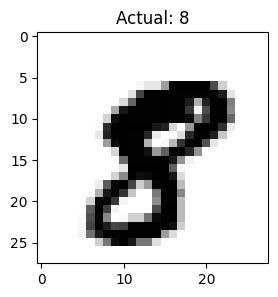

In [4]:
plot_img(10)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-01-04 14:23:54.092641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 14:23:54.479725: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-04 14:23:54.479845: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-04 14:23:55.600262: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [6]:
input_layer = keras.Input(shape=(28,28,1))
x = layers.Conv2D(32, 5, padding='same', activation='relu')(input_layer)
x = layers.MaxPool2D(strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(64, 5, padding='same', activation='relu')(x)
x = layers.MaxPool2D(strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(784, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=input_layer, outputs=outputs, name='mnist_model')

2023-01-04 14:23:59.488710: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-04 14:23:59.489010: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-04 14:23:59.489032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (andy-XPS-13-9360): /proc/driver/nvidia/version does not exist
2023-01-04 14:23:59.489448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [47]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/2


2023-01-04 11:39:48.510947: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 94832640 exceeds 10% of free system memory.


473/473 [==============================] - 54s 111ms/step - loss: 0.1046 - accuracy: 0.9717 - val_loss: 0.0792 - val_accuracy: 0.9788
Epoch 2/2
473/473 [==============================] - 53s 113ms/step - loss: 0.0575 - accuracy: 0.9838 - val_loss: 0.0845 - val_accuracy: 0.9786


In [49]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
  1/473 [..............................] - ETA: 52s - loss: 0.1590 - accuracy: 0.9688

2023-01-04 11:52:47.773685: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 94832640 exceeds 10% of free system memory.


473/473 [==============================] - 51s 108ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0732 - val_accuracy: 0.9827
Epoch 2/10
473/473 [==============================] - 59s 126ms/step - loss: 0.0324 - accuracy: 0.9908 - val_loss: 0.0828 - val_accuracy: 0.9831
Epoch 3/10
473/473 [==============================] - 54s 115ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.0758 - val_accuracy: 0.9840
Epoch 4/10
473/473 [==============================] - 53s 113ms/step - loss: 0.0224 - accuracy: 0.9939 - val_loss: 0.0808 - val_accuracy: 0.9829
Epoch 5/10
473/473 [==============================] - 54s 113ms/step - loss: 0.0222 - accuracy: 0.9937 - val_loss: 0.0604 - val_accuracy: 0.9885
Epoch 6/10
473/473 [==============================] - 54s 114ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.0611 - val_accuracy: 0.9868
Epoch 7/10
473/473 [==============================] - 54s 114ms/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0464 - val_accuracy: 0.9

In [50]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

132/132 - 2s - loss: 0.0477 - accuracy: 0.9910 - 2s/epoch - 12ms/step
Test loss: 0.04774995148181915
Test accuracy: 0.9909523725509644


In [53]:
y_pred = model.predict(x_test)

132/132 [==============================] - 2s 14ms/step


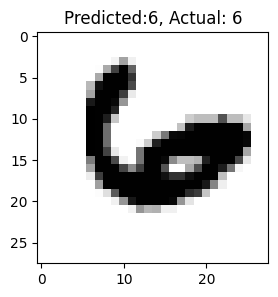

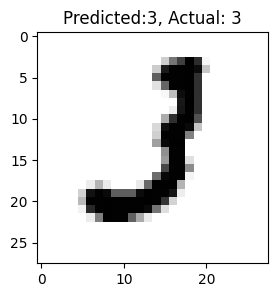

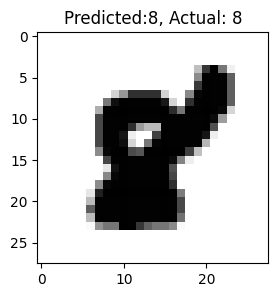

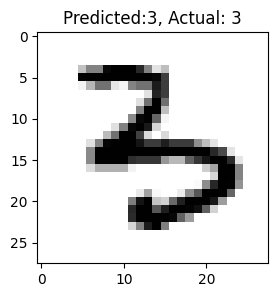

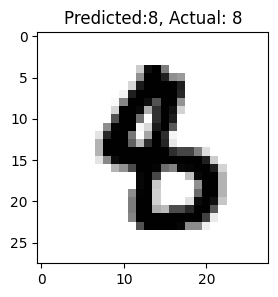

In [59]:
for idx in range(5):
    plt.figure(figsize=(3,3))
    plt.title('Predicted:%d, Actual: %d'%(np.argmax(y_pred[idx]), y_test[idx]))
    plt.imshow(x_test[idx], cmap='gray_r', vmin=0, vmax=1)

In [61]:
sub = np.loadtxt('test.csv', skiprows=1, delimiter=',')
sub = sub.reshape([-1, 28, 28])/255

In [62]:
sub.shape

(28000, 28, 28)

In [63]:
sub_pred = model.predict(sub)

  8/875 [..............................] - ETA: 13s

2023-01-04 14:10:48.394254: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 87808000 exceeds 10% of free system memory.


875/875 [==============================] - 12s 14ms/step


In [67]:
sub_pred = np.argmax(sub_pred, axis=1)

In [70]:
sub_pred

array([2, 0, 9, ..., 3, 9, 2])

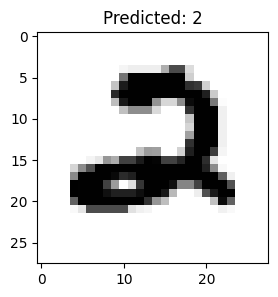

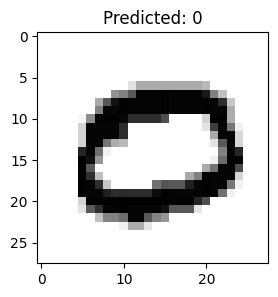

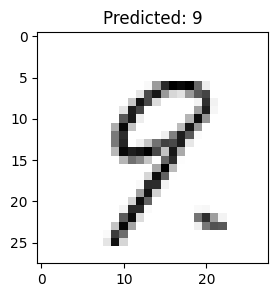

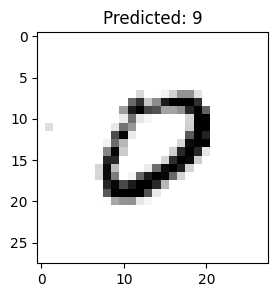

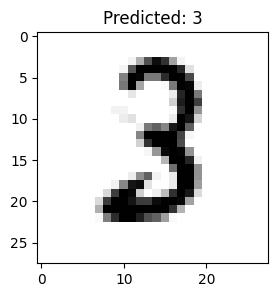

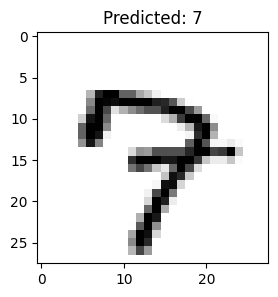

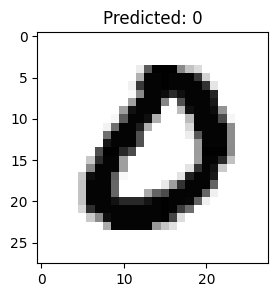

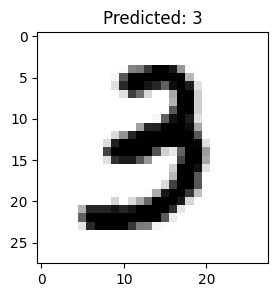

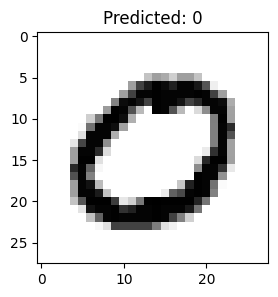

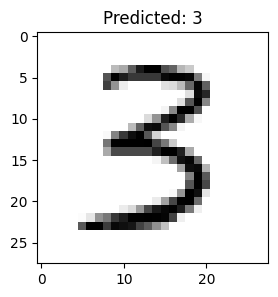

In [73]:
for idx in range(10):
    plt.figure(figsize=(3,3))
    plt.title('Predicted: %d'%(sub_pred[idx]))
    plt.imshow(sub[idx], cmap='gray_r', vmin=0, vmax=1)

In [76]:
rows = [[idx, val] for idx, val in zip(range(1, len(sub_pred)+1), sub_pred)]

with open('submission.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    csvwriter.writerow(['ImageId','Label'])
    csvwriter.writerows(rows)